## Part1: Exploratory Data Analysis(EDA)

In [3]:
import seaborn as sns

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
data.isnull().sum() #checking for total null values

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

The **age, Cabin and Embarked** have null values. I will try to fix them.

### How many Survived??

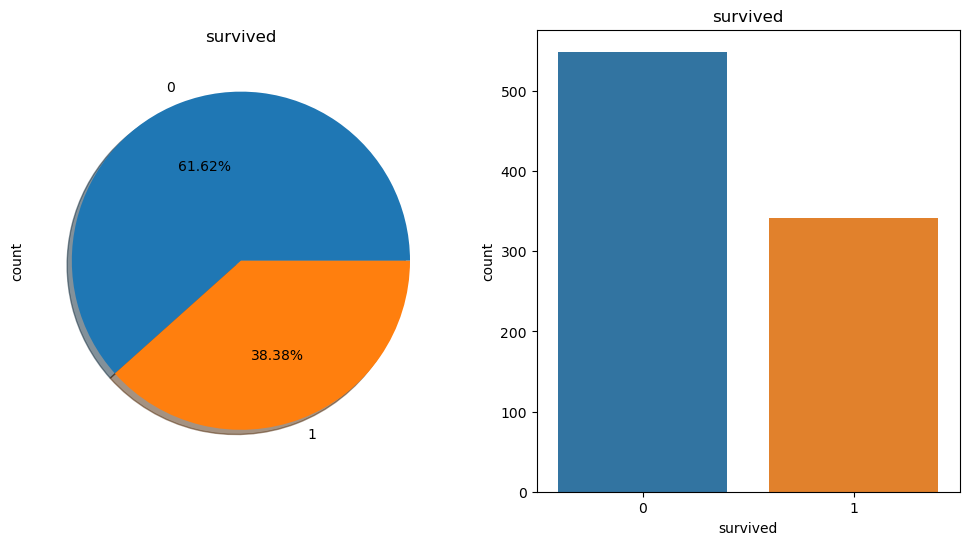

In [37]:
fig,ax = plt.subplots(1, 2, figsize=(12,6))

data['survived'].value_counts().plot.pie(autopct='%.2f%%', ax=ax[0], shadow=True)

ax[0].set_title('survived')

sns.countplot(x=data['survived'], ax=ax[1])

ax[1].set_title('survived')

plt.show()

### How many Survived based on Sex??

In [38]:
data.groupby(['sex'])['survived'].count()

sex
female    314
male      577
Name: survived, dtype: int64

In [39]:
data.groupby(['sex','survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

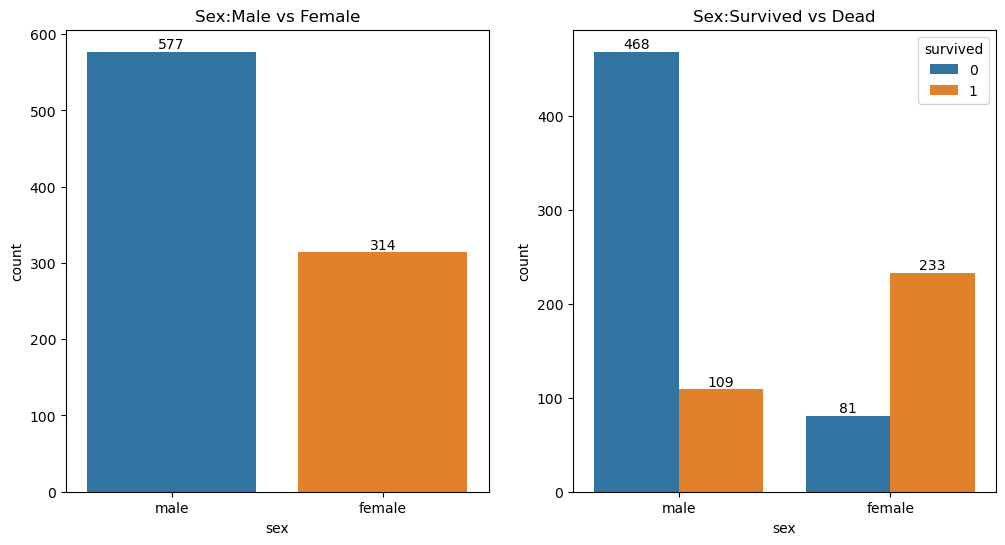

In [42]:
fig,ax=plt.subplots(1,2,figsize=(12,6))

datalabel = sns.countplot(x='sex',data=data,ax=ax[0])
ax[0].set_title('Sex:Male vs Female')

for i in datalabel.containers:
    datalabel.bar_label(i,)

datalabel = sns.countplot(x='sex',hue='survived',data=data,ax=ax[1])
for i in datalabel.containers:
    datalabel.bar_label(i,)
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

### How many Survived based on pclass?

In [43]:
pd.crosstab(data.pclass, data.survived)

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


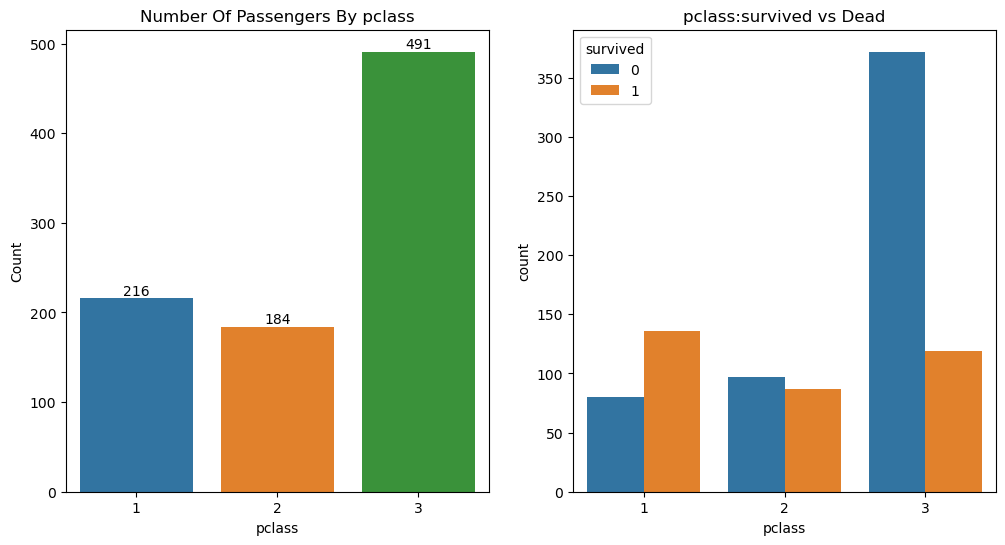

In [44]:
fig,ax=plt.subplots(1,2,figsize=(12,6))

datalabel = sns.countplot(x='pclass', data=data, ax=ax[0])

for i in datalabel.containers:
    datalabel.bar_label(i,)

ax[0].set_title('Number Of Passengers By pclass')
ax[0].set_ylabel('Count')

sns.countplot(x='pclass', hue='survived', data=data, ax=ax[1])

ax[1].set_title('pclass:survived vs Dead')
plt.show()

### How many Survived based on pclass and sex??

In [45]:
pd.crosstab([data.sex,data.survived],data.pclass)

pclass            1   2    3
sex    survived             
female 0          3   6   72
       1         91  70   72
male   0         77  91  300
       1         45  17   47

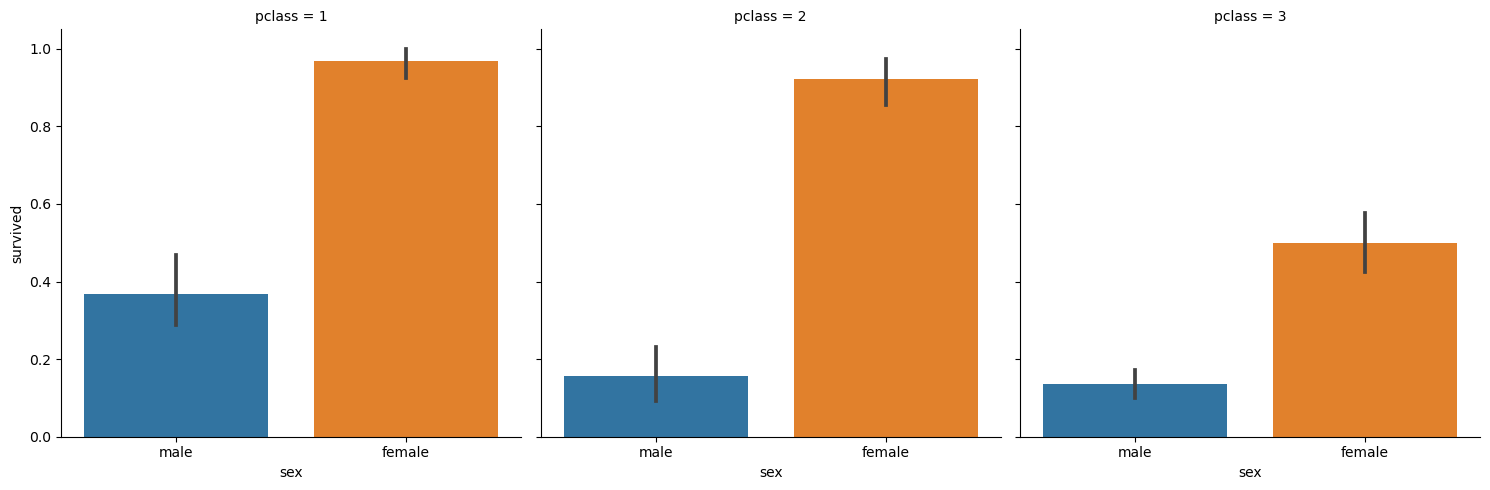

In [46]:
sns.catplot(x="sex", y="survived", col="pclass", kind="bar", data=data)
plt.show()

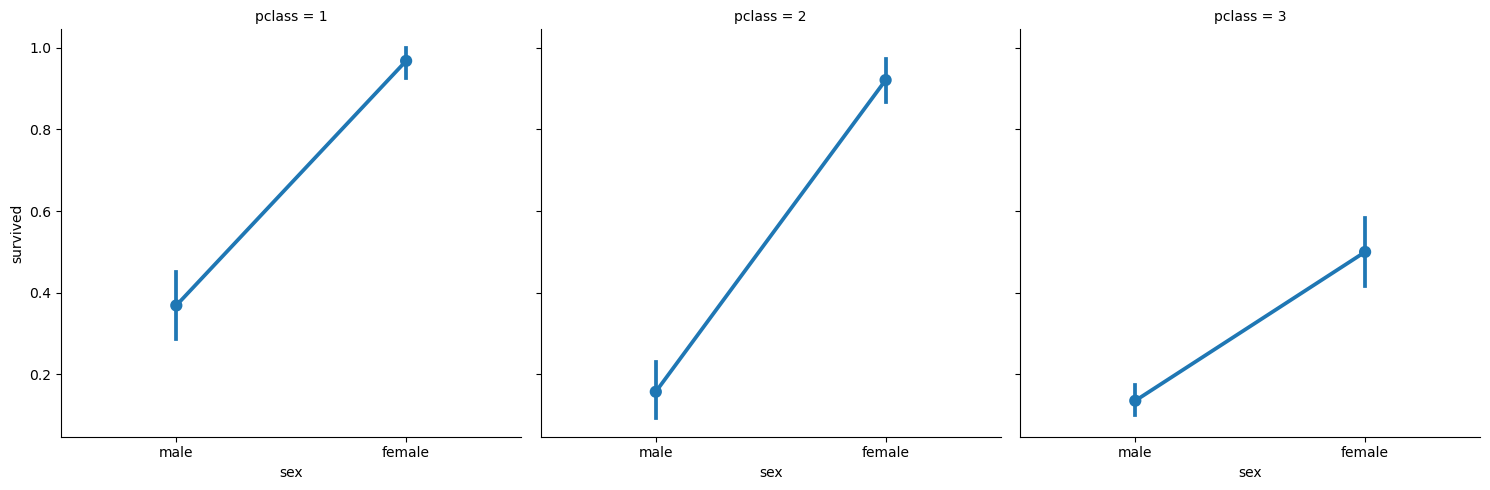

In [47]:
sns.catplot(x="sex", y="survived", col="pclass", kind="point", data=data)
plt.show()

### How many Survived based on age??

In [51]:
agedata = data[data['survived']==1].age
agedata

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: age, Length: 342, dtype: float64

In [55]:
temp = data[data['survived']==0].age
temp

0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
       ... 
884    25.0
885    39.0
886    27.0
888     NaN
890    32.0
Name: age, Length: 549, dtype: float64

<Axes: >

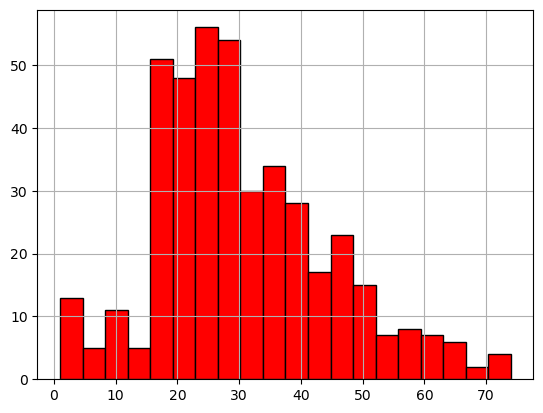

In [56]:
temp.hist(bins=20,edgecolor='black',color='red')

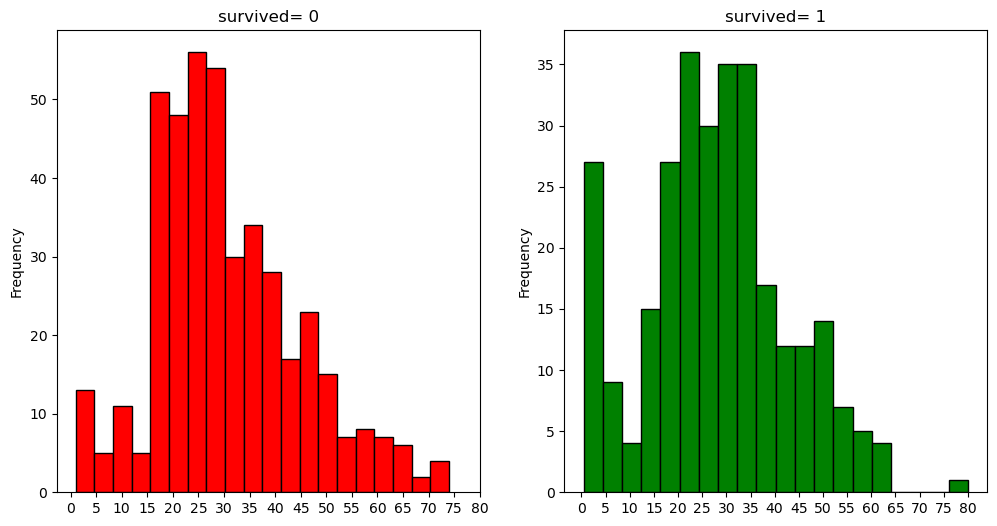

In [52]:
fig,ax=plt.subplots(1,2,figsize=(12,6))

data[data['survived']==0].age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['survived']==1].age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()

### Observations:
1)The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).

2)The oldest Passenger was saved(80 years).

3)Maximum number of deaths were in the age group of 30-40.

In [57]:
data['age_group']=0
data.loc[data['age']<=16,'age_group']='Child'
data.loc[(data['age']>16)&(data['age']<=32),'age_group']='Young'
data.loc[(data['age']>32)&(data['age']<=48),'age_group']='Middle'
data.loc[(data['age']>48)&(data['age']<=64),'age_group']='Old'
data.loc[data['age']>64,'age_group']='Upper Old'

In [58]:
data['age_group'].value_counts().to_frame()

,count
age_group,
Young,346
Middle,188
0,177
Child,100
Old,69
Upper Old,11


In [59]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Young
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Middle
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Young
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Middle
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,Young
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,Young
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,Young


In [60]:
data.groupby('age_group')['survived'].sum()

age_group
0             52
Child         55
Middle        76
Old           30
Upper Old      1
Young        128
Name: survived, dtype: int64

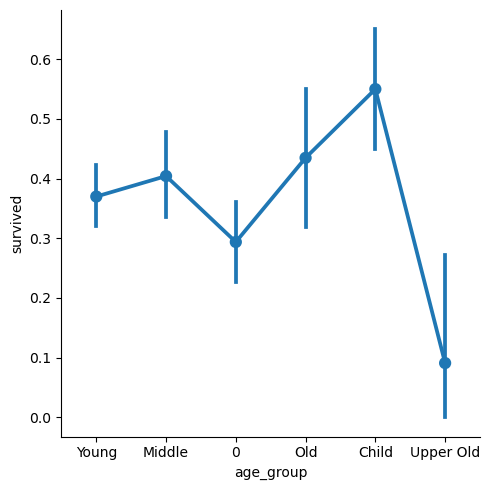

In [61]:
sns.catplot(x= 'age_group', y='survived',data=data, kind='point')
plt.show()

### How many Survived based on pclass and age??


In [ ]:
fig,ax=plt.subplots(figsize=(10,6))

sns.violinplot(x="pclass",y="age", data=data, ax=ax)
ax.set_title('pclass and age')
ax.set_yticks(range(0,110,10))

plt.show()

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))

sns.violinplot(x="pclass",y="age", hue="survived", data=data, ax=ax)
ax.set_title('pclass and age')
ax.set_yticks(range(0,110,10))

plt.show()

### Chances for Survival by Port Of Embarkation

In [ ]:
data['embarked'].value_counts()

In [ ]:
data.groupby('embarked')['survived'].sum()

In [ ]:
sns.catplot(x='embarked',y='survived', kind="point", data=data)

plt.show()

The chances for survival for Port C is highest around 0.55 while it is lowest for S.

In [ ]:
fig, ax=plt.subplots(2,2,figsize=(10,6))

sns.countplot(x='embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot(x='embarked',hue='sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot(x='embarked',hue='survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot(x='embarked',hue='pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

### Observations:
1)Maximum passenegers boarded from S. Majority of them being from pclass3.

2)The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the pclass1 and pclass2 Passengers.

3)The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from pclass3 around **81%** didn't survive. 

4)Port Q had almost 95% of the passengers were from pclass3.

In [ ]:
sns.catplot(x='pclass',y='survived',hue='sex',
            col='embarked', kind="point", data=data)
plt.show()

### Observations:

1)The survival chances are almost 1 for women for pclass1 and pclass2 irrespective of the pclass.

2)Port S looks to be very unlucky for pclass3 Passenegers as the survival rate for both men and women is very low.**(Money Matters)**

3)Port Q looks looks to be unlukiest for Men, as almost all were from pclass 3.


## SibSip-->Discrete Feature
This feature represents whether a person is alone or with his family members.

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife 

In [ ]:
pd.crosstab([data.sibsp],data.survived)

In [ ]:
sns.catplot(x='sibsp',y='survived', kind="point", data=data)

plt.show()

### Observations:


The barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is **0%**. The reason may be pclass??

The reason is **pclass**. The crosstab shows that Person with SibSp>3 were all in pclass3. It is imminent that all the large families in pclass3(>3) died.

## Fare--> Continous Feature

In [ ]:
print('Highest Fare was:',data['fare'].max())
print('Lowest Fare was:',data['fare'].min())
print('Average Fare was:',data['fare'].mean())

The lowest fare is **0.0**. Wow!! a free luxorious ride. 

In [ ]:
data[data.fare < 100]['survived'].sum()

In [ ]:
low = data[data.fare < 100]['survived'].sum()
medium = data[(data.fare >= 100) & (data.fare < 200)]['survived'].sum()
high = data[data.fare >= 200]['survived'].sum()

Fare_wise_survived_range = [low, medium, high]
Fare_wise_survived_range

In [ ]:
plt.figure(figsize=(6,6), dpi=100)

label = ['Below 100', '100 to 200', 'Above 200']

explode = [0,.2,.2]

plt.pie(Fare_wise_survived_range, labels=label, explode= explode, 
        autopct='%.2f %%', textprops={'color':"w"},  pctdistance=0.8)

plt.title("Fare Range wise Survived")

plt.legend(title="Fare Range")


plt.show()

In [ ]:
data['Fare_cat']=0
data.loc[data['fare']<=100,'Fare_cat']='Low'
data.loc[(data['fare']>100)&(data['fare']<=200),'Fare_cat']='Medium'
data.loc[(data['fare']>200),'Fare_cat']='High'

In [ ]:
data['Fare_cat'].value_counts()

In [ ]:
data.groupby('Fare_cat')['survived'].sum()

In [ ]:
sns.catplot(x='Fare_cat',y='survived',data=data, kind='point')
plt.show()

In [ ]:
data['Fare_Range'] = pd.qcut(data['fare'], 3)
data.groupby(['Fare_Range'])['survived'].mean().to_frame()

In [ ]:
sns.catplot(x='Fare_Range',y='survived',data=data, kind='point')
plt.show()

There looks to be a large distribution in the fares of Passengers in pclass1 and this distribution goes on decreasing as the standards reduces. As this is also continous, we can convert into discrete values by using binning.

## Observations in a Nutshell for all features:
**Sex:** The chance of survival for women is high as compared to men.

**pclass:**There is a visible trend that being a **1st class passenger** gives you better chances of survival. The survival rate for **pclass3 is very low**. For **women**, the chance of survival from **pclass1** is almost 1 and is high too for those from **pclass2**.   **Money Wins!!!**. 

**age:** Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

**Embarked:** This is a very interesting feature. **The chances of survival at C looks to be better than even though the majority of pclass1 passengers got up at S.** Passengers at Q were all from **pclass3**. 

**SibSp:** Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.

## Correlation Between The Features

In [ ]:
data.corr()

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 

plt.show()